# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set units for query
units = "metric"

# Create query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (query_url + city) 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mugia
Processing Record 2 of Set 1 | nkhotakota
Processing Record 3 of Set 1 | sinabang
Processing Record 4 of Set 1 | chegdomyn
Processing Record 5 of Set 1 | ghanzi
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | sukhinichi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | lawrenceburg
Processing Record 12 of Set 1 | filadelfia
Processing Record 13 of Set 1 | flin flon
Processing Record 14 of Set 1 | mandalgovi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ambovombe
Processing Record 17 of Set 1 | palmer
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | banda aceh
Processing Record 20 of Set 1 | rockport
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | ar ruways
Proce

Processing Record 42 of Set 4 | arkhangel'sk
Processing Record 43 of Set 4 | hoxtolgay
City not found. Skipping...
Processing Record 44 of Set 4 | nova sintra
Processing Record 45 of Set 4 | jeremie
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | thunder bay
Processing Record 48 of Set 4 | petropavlovsk-kamchatsky
Processing Record 49 of Set 4 | polyarnyy
Processing Record 0 of Set 5 | tual
Processing Record 1 of Set 5 | acapulco de juarez
Processing Record 2 of Set 5 | iskateley
Processing Record 3 of Set 5 | magong
Processing Record 4 of Set 5 | xichang
Processing Record 5 of Set 5 | sarpol-e zahab
Processing Record 6 of Set 5 | chonchi
Processing Record 7 of Set 5 | murzuq
Processing Record 8 of Set 5 | smithers
Processing Record 9 of Set 5 | prince rupert
Processing Record 10 of Set 5 | granbury
Processing Record 11 of Set 5 | chibougamau
Processing Record 12 of Set 5 | brokopondo
Processing Record 13 of Set 5 | palombara sabina
Processing Record 14 of Set 5 

Processing Record 33 of Set 8 | saldanha
Processing Record 34 of Set 8 | trindade
Processing Record 35 of Set 8 | union
Processing Record 36 of Set 8 | chake chake
Processing Record 37 of Set 8 | shenkursk
Processing Record 38 of Set 8 | bani walid
Processing Record 39 of Set 8 | am djarass
City not found. Skipping...
Processing Record 40 of Set 8 | aasiaat
Processing Record 41 of Set 8 | santa ana de yacuma
Processing Record 42 of Set 8 | hamilton
Processing Record 43 of Set 8 | petrosino
Processing Record 44 of Set 8 | gadzhiyevo
Processing Record 45 of Set 8 | rice lake
Processing Record 46 of Set 8 | kesabpur
Processing Record 47 of Set 8 | san antonio oeste
Processing Record 48 of Set 8 | ahuacatlan
Processing Record 49 of Set 8 | minas de marcona
Processing Record 0 of Set 9 | mili
Processing Record 1 of Set 9 | almeirim
Processing Record 2 of Set 9 | sirte
Processing Record 3 of Set 9 | la mure
Processing Record 4 of Set 9 | nchelenge
Processing Record 5 of Set 9 | veraval
Proce

Processing Record 22 of Set 12 | nanning
Processing Record 23 of Set 12 | waounde
Processing Record 24 of Set 12 | karpinsk
Processing Record 25 of Set 12 | monjas
Processing Record 26 of Set 12 | orapa
Processing Record 27 of Set 12 | teshi old town
Processing Record 28 of Set 12 | iranshahr
Processing Record 29 of Set 12 | shambu
Processing Record 30 of Set 12 | prestatyn
Processing Record 31 of Set 12 | cacimba de dentro
Processing Record 32 of Set 12 | ishikawa
Processing Record 33 of Set 12 | beihai
Processing Record 34 of Set 12 | mutuali
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mugia,43.1041,-9.2179,13.28,70,52,8.79,ES,1702413243
1,nkhotakota,-12.9274,34.2961,26.36,68,56,1.60,MW,1702413243
2,sinabang,2.4803,96.3801,25.65,86,98,1.73,ID,1702413243
3,chegdomyn,51.1167,133.0167,-33.27,100,89,0.44,RU,1702413243
4,ghanzi,-21.5667,21.7833,27.55,41,79,4.63,BW,1702413243


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Rename columns now to make it easier to chart in subsequent steps
city_data_df =city_data_df.rename(columns={"Lat": "Latitude", "Lng": "Longitude", "Max Temp": "Maximum Temperature (C)", 
                                           "Humidity": "Humidity (%)", "Cloudiness": "Cloudiness (%)", 
                                           "Wind Speed": "Wind Speed (m/s)"})
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Maximum Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,mugia,43.1041,-9.2179,13.28,70,52,8.79,ES,1702413243
1,nkhotakota,-12.9274,34.2961,26.36,68,56,1.60,MW,1702413243
2,sinabang,2.4803,96.3801,25.65,86,98,1.73,ID,1702413243
3,chegdomyn,51.1167,133.0167,-33.27,100,89,0.44,RU,1702413243
4,ghanzi,-21.5667,21.7833,27.55,41,79,4.63,BW,1702413243


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

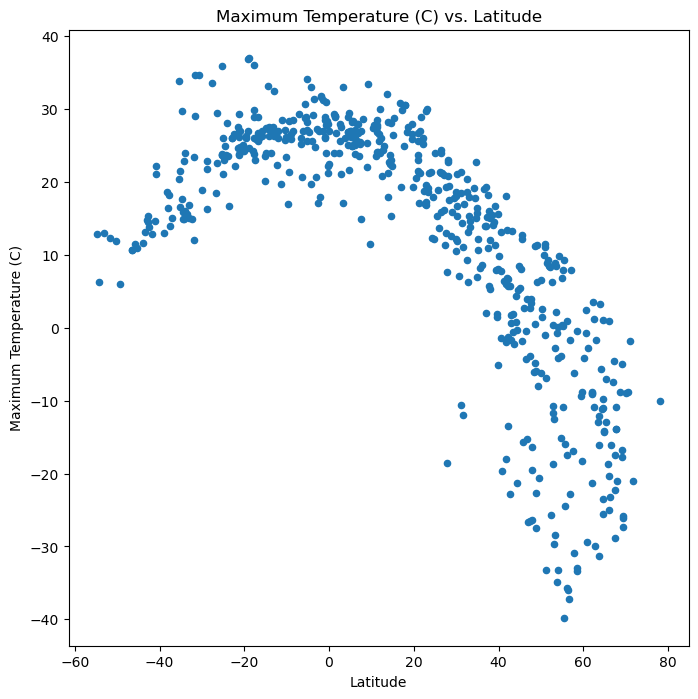

In [8]:
# Build scatter plot for latitude vs. temperature
# Make a function to make the plotting easier for subsequent steps
def scatterplot():
    city_data_df.plot(kind="scatter", x=x_title, y=y_title, grid=False, figsize=(8,8),
        title=(f"{y_title} vs. {x_title}"), )
    
# Define variables for the latitude vs. temperature scatterplot
x_title = "Latitude"
y_title = "Maximum Temperature (C)"

# Call the function
scatterplot()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

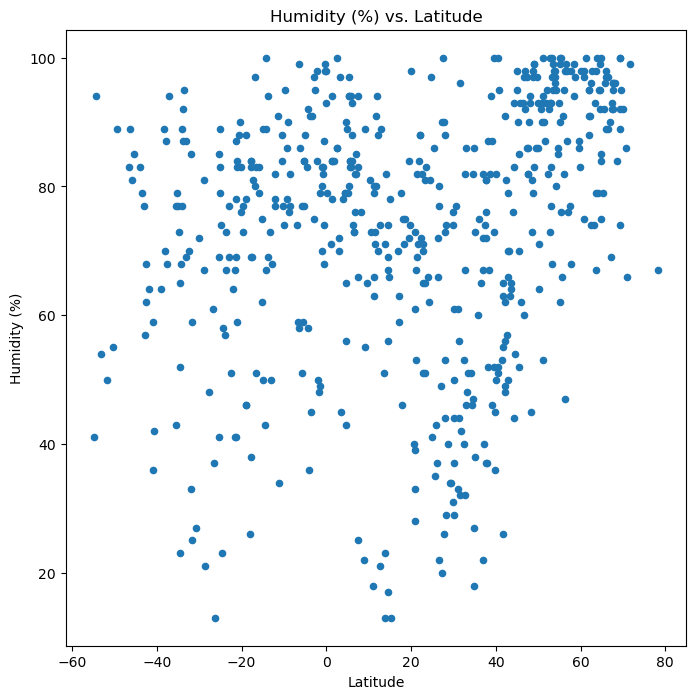

In [9]:
# Build the scatter plots for latitude vs. humidity
# Define variables for this scatterplot
x_title = "Latitude"
y_title = "Humidity (%)"

# Call the function
scatterplot()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

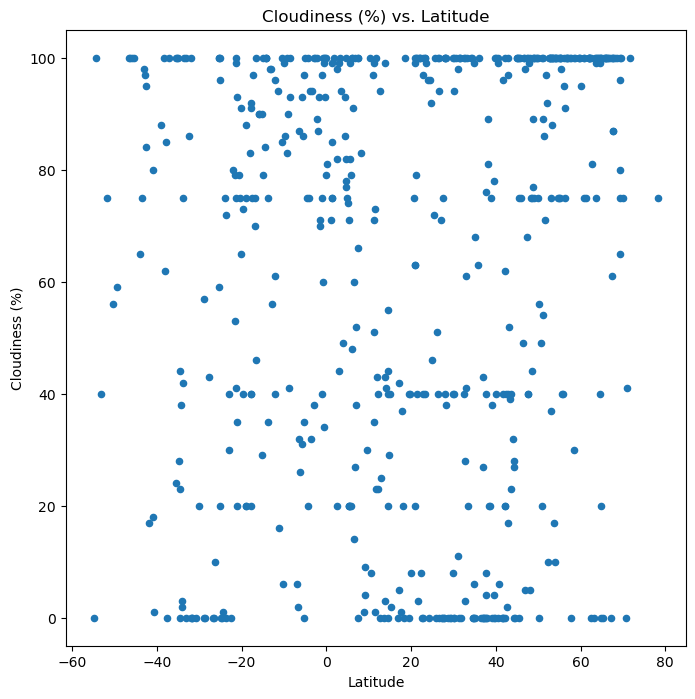

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Define variables for this scatterplot
x_title = "Latitude"
y_title = "Cloudiness (%)"

# Call the function
scatterplot()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

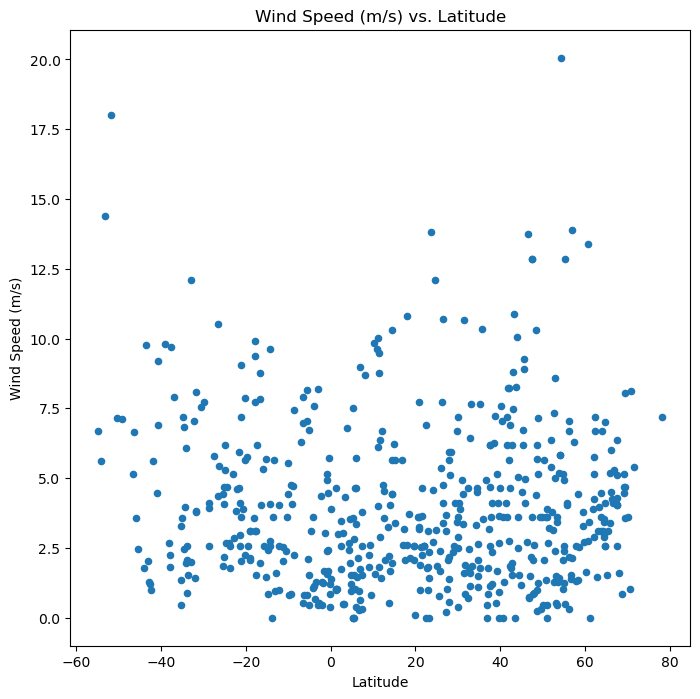

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Define variables for this scatterplot
x_title = "Latitude"
y_title = "Wind Speed (m/s)"

# Call the function
scatterplot()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plot
def lin_regression():
    # Code to make plot
    dataframevar.plot(kind="scatter", x=x_title, y=y_title, grid=False, figsize=(8,8),
        title=(f"{y_title} vs. {x_title}"), )
    
    # Create variables for x and y axis of linear regression
    xax = dataframevar[f"{x_title}"]
    yax = dataframevar[f"{y_title}"]
    
    # Linear regression
    r_slope, r_int, r_r, r_p, r_std_err = st.linregress(
        xax, yax)
    
    # Making equation and plot the line on the graph
    r_fit = r_slope * xax + r_int
    plt.plot(xax,r_fit,"--")
    
    # Print the equation and correlation
    print(f"Linear regression eqn: {y_title} = {r_slope} * {x_title} + {r_int}")
    print(f"The correlation is {r_r}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
lat_filter = city_data_df["Latitude"] >= 0
northern_hemi_df = city_data_df.loc[lat_filter,:]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,mugia,43.1041,-9.2179,13.28,70,52,8.79,ES,1702413243
2,sinabang,2.4803,96.3801,25.65,86,98,1.73,ID,1702413243
3,chegdomyn,51.1167,133.0167,-33.27,100,89,0.44,RU,1702413243
5,iqaluit,63.7506,-68.5145,-12.15,67,75,3.60,CA,1702413244
6,sukhinichi,54.0999,35.3425,-4.11,95,100,5.82,RU,1702413244


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
lat_filter = city_data_df["Latitude"] <= 0
southern_hemi_df = city_data_df.loc[lat_filter,:]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
1,nkhotakota,-12.9274,34.2961,26.36,68,56,1.60,MW,1702413243
4,ghanzi,-21.5667,21.7833,27.55,41,79,4.63,BW,1702413243
7,adamstown,-25.0660,-130.1015,21.13,89,100,4.07,PN,1702413244
9,edinburgh of the seven seas,-37.0676,-12.3116,15.11,94,100,7.90,SH,1702413244
14,port-aux-francais,-49.3500,70.2167,6.00,89,59,7.11,TF,1702413245


###  Temperature vs. Latitude Linear Regression Plot

Linear regression eqn: Maximum Temperature (C) = -0.7358094554173114 * Latitude + 34.04206960282487
The correlation is -0.8320026362499074


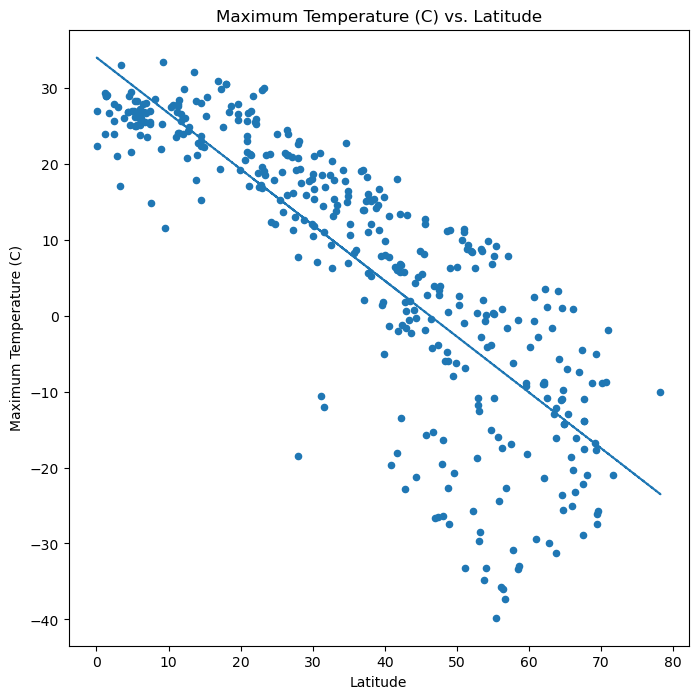

In [15]:
# Linear regression on Northern Hemisphere
# Define variables for this plot
dataframevar = northern_hemi_df
x_title = "Latitude"
y_title = "Maximum Temperature (C)"

# Call function
lin_regression()

Linear regression eqn: Maximum Temperature (C) = 0.29657727176845705 * Latitude + 29.743378279655758
The correlation is 0.6587002170583472


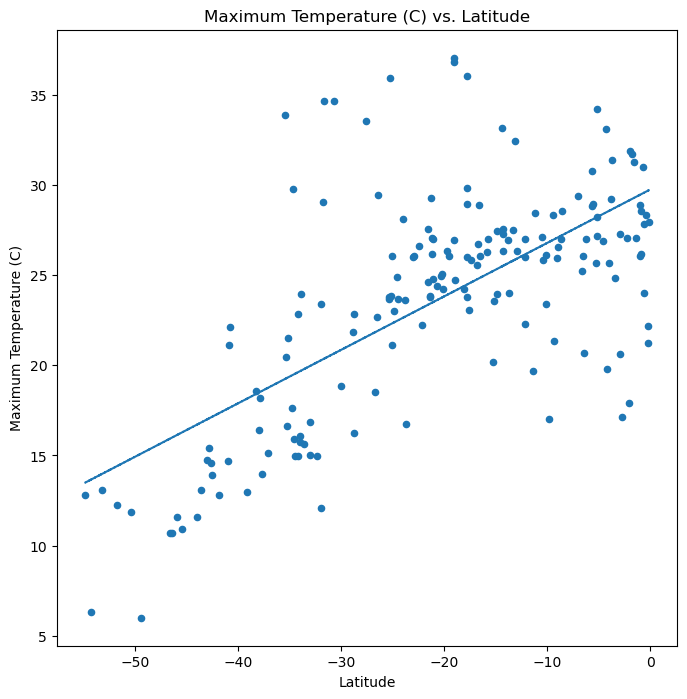

In [16]:
# Linear regression on Southern Hemisphere
# Define variables for this plot
dataframevar = southern_hemi_df
x_title = "Latitude"
y_title = "Maximum Temperature (C)"

# Call function
lin_regression()

**Discussion about the linear relationship:** For the Northern Hemisphere, there is a strong negative correlation between temperature and latitude, as evidenced by the r value of -0.827. Visually, the scatterplotappears to be fairly linear. The slope indicates that the temperature decreased on average by 0.80 degrees C for every one unit increase in latitude. For the Southern hemisphere, the r value of 0.64 indicates that there is a mild (close to strong) positive correlation between temperature and latitude. Visually, the scatterplot appears linear. The slope indicates that the temperature rises on average by 0.26 degrees C for every degree increase in latitude.

### Humidity vs. Latitude Linear Regression Plot

Linear regression eqn: Humidity (%) = 0.3418698963770277 * Latitude + 61.73969193007729
The correlation is 0.32445059457843733


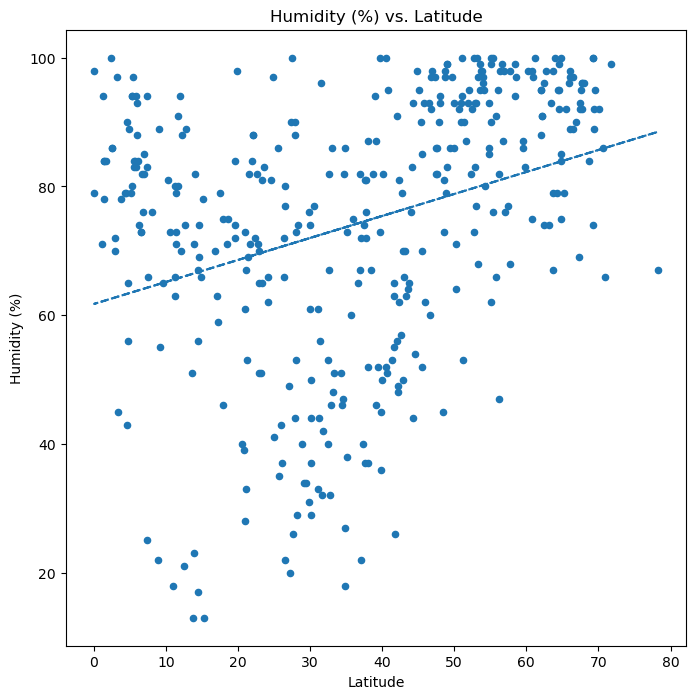

In [17]:
# Northern Hemisphere
# Define variables for this plot
dataframevar = northern_hemi_df
x_title = "Latitude"
y_title = "Humidity (%)"

# Call function
lin_regression()

Linear regression eqn: Humidity (%) = 0.26635436625485015 * Latitude + 76.48856708936891
The correlation is 0.19770331849246242


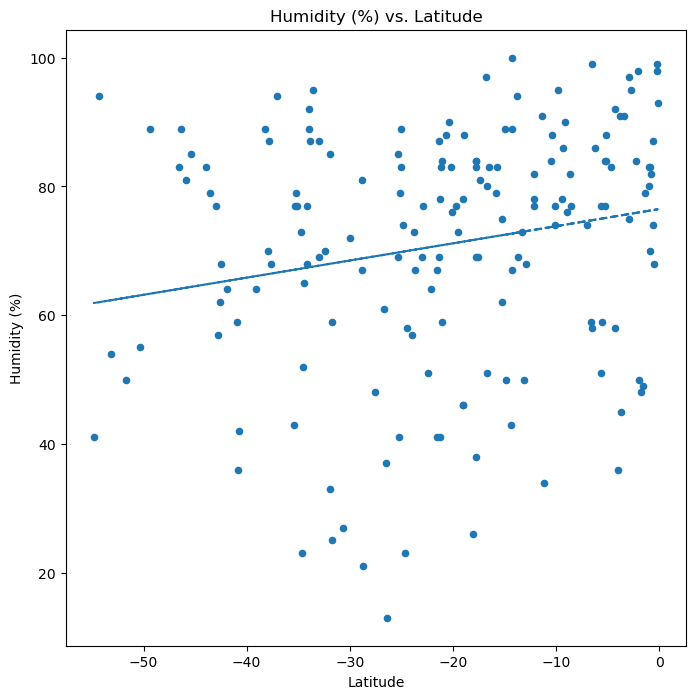

In [18]:
# Southern Hemisphere
# Define variables for this plot
dataframevar = southern_hemi_df
x_title = "Latitude"
y_title = "Humidity (%)"

# Call function
lin_regression()

**Discussion about the linear relationship:** For both the Northern and Southern hemispheres, there is a weak/very mild positive correlation between humidity and latitude, as evidenced by the r values of 0.37 and 0.31. Visually, the scatterplots seem only slightly linear and the points seem spread out. The slopes are almost identical for both hemispheres, and show that the humidity % increases by approximately 0.40 for every degree increase in latitude.

### Cloudiness vs. Latitude Linear Regression Plot

Linear regression eqn: Cloudiness (%) = 0.4311244522178417 * Latitude + 45.903460649591054
The correlation is 0.2206794916393979


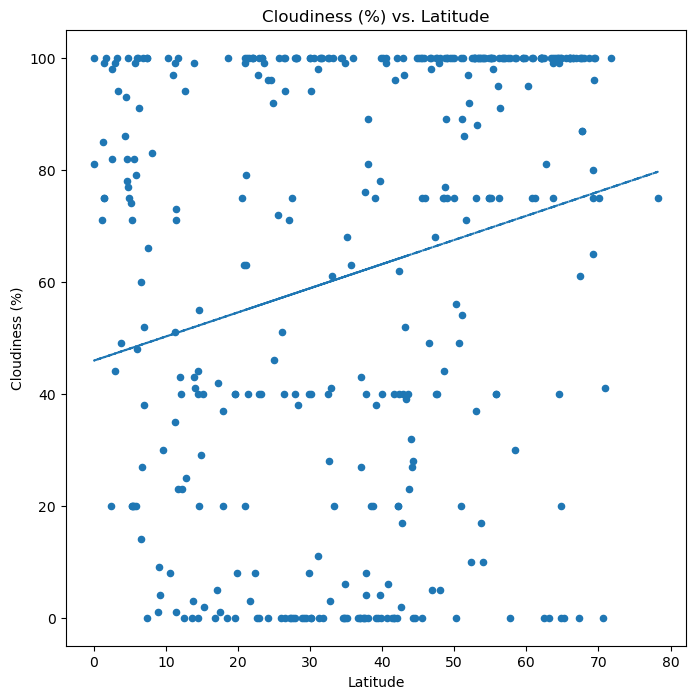

In [19]:
# Northern Hemisphere
# Define variables for this plot
dataframevar = northern_hemi_df
x_title = "Latitude"
y_title = "Cloudiness (%)"

# Call function
lin_regression()

Linear regression eqn: Cloudiness (%) = 0.4282239710056264 * Latitude + 71.54935136113495
The correlation is 0.168102506305523


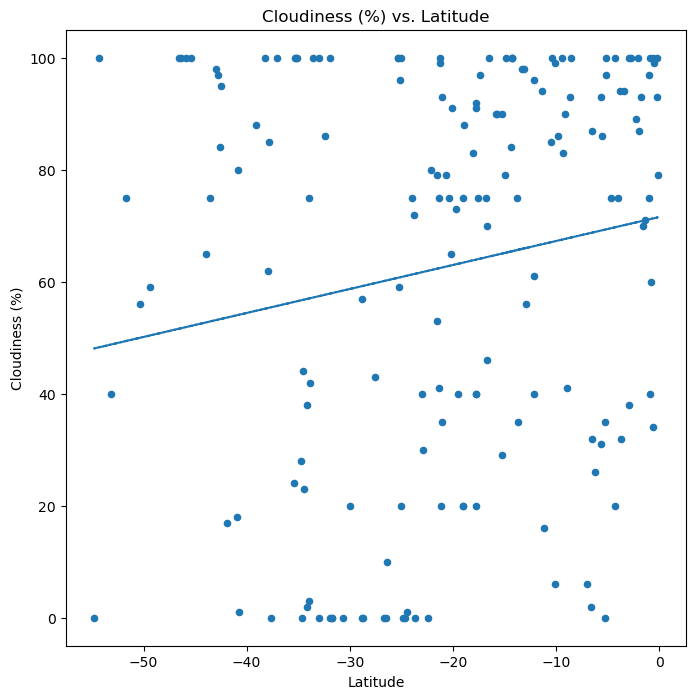

In [20]:
# Southern Hemisphere
# Define variables for this plot
dataframevar = southern_hemi_df
x_title = "Latitude"
y_title = "Cloudiness (%)"

# Call function
lin_regression()

**Discussion about the linear relationship:** For both the Northern and Southern hemispheres, there does not appear to be a  correlation between cloudiness and latitude, as evidenced by the r values of 0.25 and 0.13. Visually, the scatterplots do not look linear and the cloudiness appears to be random in relation to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

Linear regression eqn: Wind Speed (m/s) = 0.018058285777339197 * Latitude + 3.16349380675359
The correlation is 0.12476034939226077


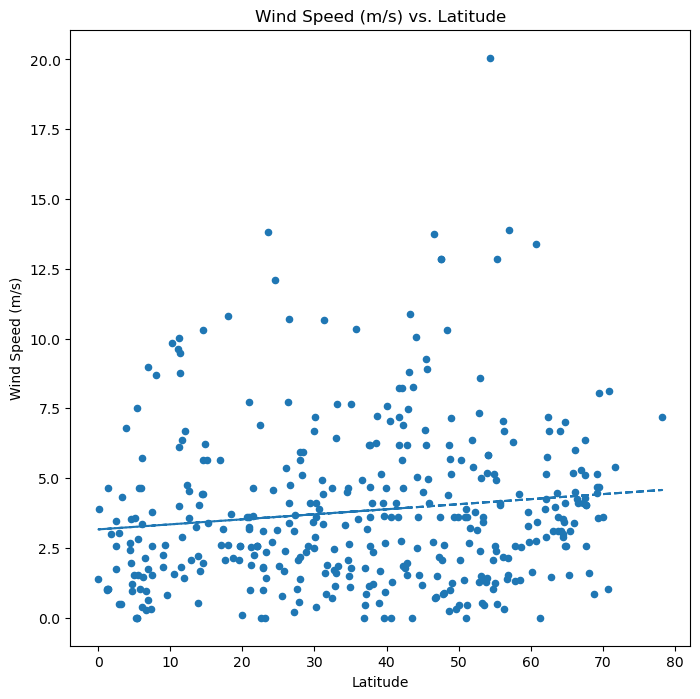

In [21]:
# Northern Hemisphere
# Define variables for this plot
dataframevar = northern_hemi_df
x_title = "Latitude"
y_title = "Wind Speed (m/s)"

# Call function
lin_regression()

Linear regression eqn: Wind Speed (m/s) = -0.06634795613553757 * Latitude + 2.767314690512314
The correlation is -0.3185026275394649


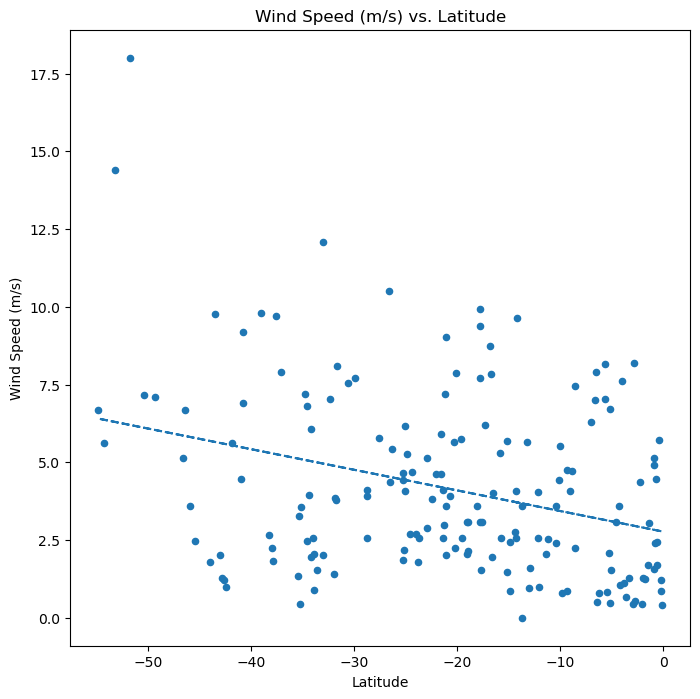

In [22]:
# Southern Hemisphere
# Define variables for this plot
dataframevar = southern_hemi_df
x_title = "Latitude"
y_title = "Wind Speed (m/s)"

# Call function
lin_regression()

**Discussion about the linear relationship:** For both the Northern and Southern hemispheres, there does not appear to be a  correlation between wind speed and latitude, as evidenced by the r values of 0.10 and -0.29. Visually, the scatterplots do not look linear and the wind speed appears to be random in relation to latitude.